# <span style="color:red">ch9_ 시계열 데이터 분석 및 예측 </span>
 - %pip install statsmodels==0.13.5 #주기적인 데이터 트렌드
 - %pip install prophet # facebook에서 개발한 시계열 예측 11b

In [1]:
%pip install statsmodels==0.13.5
%pip install prophet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#한글설정
plt.rc('font',family="Malgun Gothic") #Windows에서 시각화시 한글 깨짐 방지
plt.rc('axes', unicode_minus=False) #축의 -깨짐 방지

In [3]:
#AirKoread 사이트에 다운로드
df = pd.read_csv('data/일별평균대기오염도_2022(에어코리아).csv', encoding='cp949')
df.tail()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
18245,20221231,구로구,0.037,0.009,0.5,0.004,43.0,29.0
18246,20221231,광진구,0.026,0.005,0.8,0.003,44.0,34.0
18247,20221231,관악산,0.008,0.038,0.3,0.005,29.0,18.0
18248,20221231,관악구,0.045,0.009,0.7,0.003,42.0,28.0
18249,20221231,공항대로,0.042,0.007,0.7,0.004,41.0,31.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          18250 non-null  int64  
 1   측정소명          18250 non-null  object 
 2   이산화질소농도(ppm)  18172 non-null  float64
 3   오존농도(ppm)     18176 non-null  float64
 4   일산화탄소농도(ppm)  18174 non-null  float64
 5   아황산가스농도(ppm)  18176 non-null  float64
 6   미세먼지농도(㎍/㎥)   18115 non-null  float64
 7   초미세먼지농도(㎍/㎥)  18122 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.1+ MB


In [5]:
#미세먼지 농도 결측치인 데이터
df[df['미세먼지농도(㎍/㎥)'].isna()]

# 결측치가 한 열이라도 있는 행
df[df.isna().any(axis=1)]


,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
287,20220106,남산,0.033,0.015,0.7,0.004,NaN,NaN
339,20220107,남산,0.039,0.016,0.8,0.005,NaN,NaN
387,20220108,남산,0.048,0.011,0.8,0.004,NaN,NaN
437,20220109,남산,0.027,0.024,1.0,0.003,NaN,NaN
490,20220110,남산,0.049,0.012,1.0,0.003,NaN,NaN
...,...,...,...,...,...,...,...,...
15841,20221113,관악산,0.010,0.022,0.3,0.003,NaN,7.0
15842,20221113,관악구,NaN,NaN,NaN,NaN,NaN,NaN
16503,20221127,행주,NaN,NaN,NaN,NaN,24.0,10.0
16591,20221128,관악산,0.008,0.040,0.2,0.003,NaN,9.0


In [6]:
#결측치가 한 열이라도 있는 행의 측정소 명
df[df.isna().any(axis=1)]['측정소명'].unique()

#결측치가 한 열이라도 있는 행의 측정소 명
df.loc[df.isna().any(axis=1),'측정소명'].unique()

array(['남산', '세곡', '관악산', '마포아트센터', '서대문구', '도산대로', '북한산', '항동', '동작구',
       '서초구', '동작대로', '행주', '올림픽공원', '동대문구', '송파구', '은평구', '한강대로', '강변북로',
       '시흥대로', '성북구', '관악구'], dtype=object)

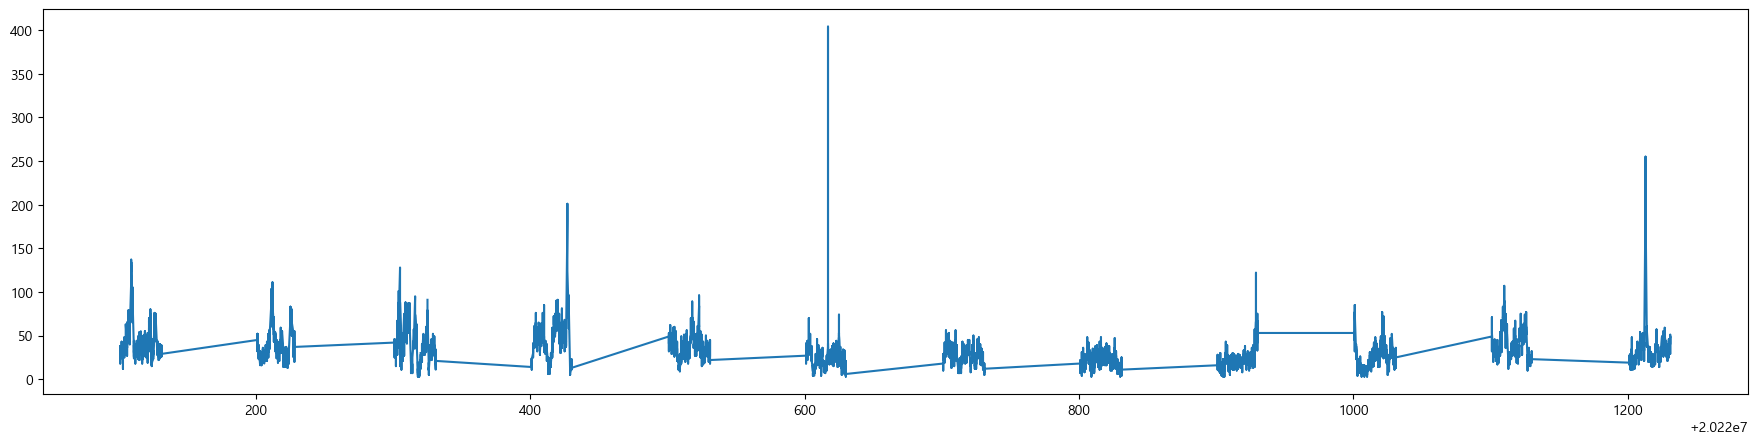

In [7]:
plt.figure(figsize=(22,5))
plt.plot(df['측정일시'],df['미세먼지농도(㎍/㎥)'])

In [8]:
#특정일시 컬럼을 날짜형으로 변환
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          18250 non-null  int64  
 1   측정소명          18250 non-null  object 
 2   이산화질소농도(ppm)  18172 non-null  float64
 3   오존농도(ppm)     18176 non-null  float64
 4   일산화탄소농도(ppm)  18174 non-null  float64
 5   아황산가스농도(ppm)  18176 non-null  float64
 6   미세먼지농도(㎍/㎥)   18115 non-null  float64
 7   초미세먼지농도(㎍/㎥)  18122 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.1+ MB


In [9]:
df['측정일'] = df['측정일시'].astype(str)
df.dtypes

측정일시              int64
측정소명             object
이산화질소농도(ppm)    float64
오존농도(ppm)       float64
일산화탄소농도(ppm)    float64
아황산가스농도(ppm)    float64
미세먼지농도(㎍/㎥)     float64
초미세먼지농도(㎍/㎥)    float64
측정일              object
dtype: object

In [10]:
df['측정일'].str[:4] + '-' + df['측정일'].str[4:6] +'-' + df['측정일'].str[6:]

0        2022-01-01
1        2022-01-01
2        2022-01-01
3        2022-01-01
4        2022-01-01
            ...    
18245    2022-12-31
18246    2022-12-31
18247    2022-12-31
18248    2022-12-31
18249    2022-12-31
Name: 측정일, Length: 18250, dtype: object

In [11]:
df[['측정일시','측정일']]

,측정일시,측정일
0,20220101,20220101
1,20220101,20220101
2,20220101,20220101
3,20220101,20220101
4,20220101,20220101
...,...,...
18245,20221231,20221231
18246,20221231,20221231
18247,20221231,20221231
18248,20221231,20221231


In [12]:
#df['측정일'].astype('datetime64[ns]')
df['측정일'] = pd.to_datetime(df['측정일'])

In [13]:
df.dtypes

측정일시                     int64
측정소명                    object
이산화질소농도(ppm)           float64
오존농도(ppm)              float64
일산화탄소농도(ppm)           float64
아황산가스농도(ppm)           float64
미세먼지농도(㎍/㎥)            float64
초미세먼지농도(㎍/㎥)           float64
측정일             datetime64[ns]
dtype: object

In [14]:

# df의 열순서를 변경
cols = df.columns.tolist()
cols = [cols[0], cols[-1]] + cols[1:-1]
df = df[cols]
df.head(1)

,측정일시,측정일,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20220101,2022-01-01,강남구,0.029,0.014,0.5,0.003,25.0,12.0


In [15]:
df= df.drop('측정일시',axis = 1)

In [16]:

df.columns = ['측정일','측정소명','이산화질소농도', '오존농도', '일산화탄소농도',
             '아황산가스농도','미세먼지농도', '초미세먼지농도']
df.sample()

,측정일,측정소명,이산화질소농도,오존농도,일산화탄소농도,아황산가스농도,미세먼지농도,초미세먼지농도
8438,2022-06-18,금천구,0.015,0.025,0.3,0.003,18.0,8.0


In [17]:

df.loc[df['측정소명']=='공항대로',['측정일','미세먼지농도']]

,측정일,미세먼지농도
44,2022-01-01,31.0
93,2022-01-02,37.0
143,2022-01-03,31.0
196,2022-01-04,48.0
244,2022-01-05,56.0
...,...,...
18043,2022-12-27,51.0
18095,2022-12-28,44.0
18143,2022-12-29,35.0
18193,2022-12-30,40.0


In [18]:

# 결측치가 없는 측정소명만 추출
df_flt = df[df['측정소명']=='공항대로']

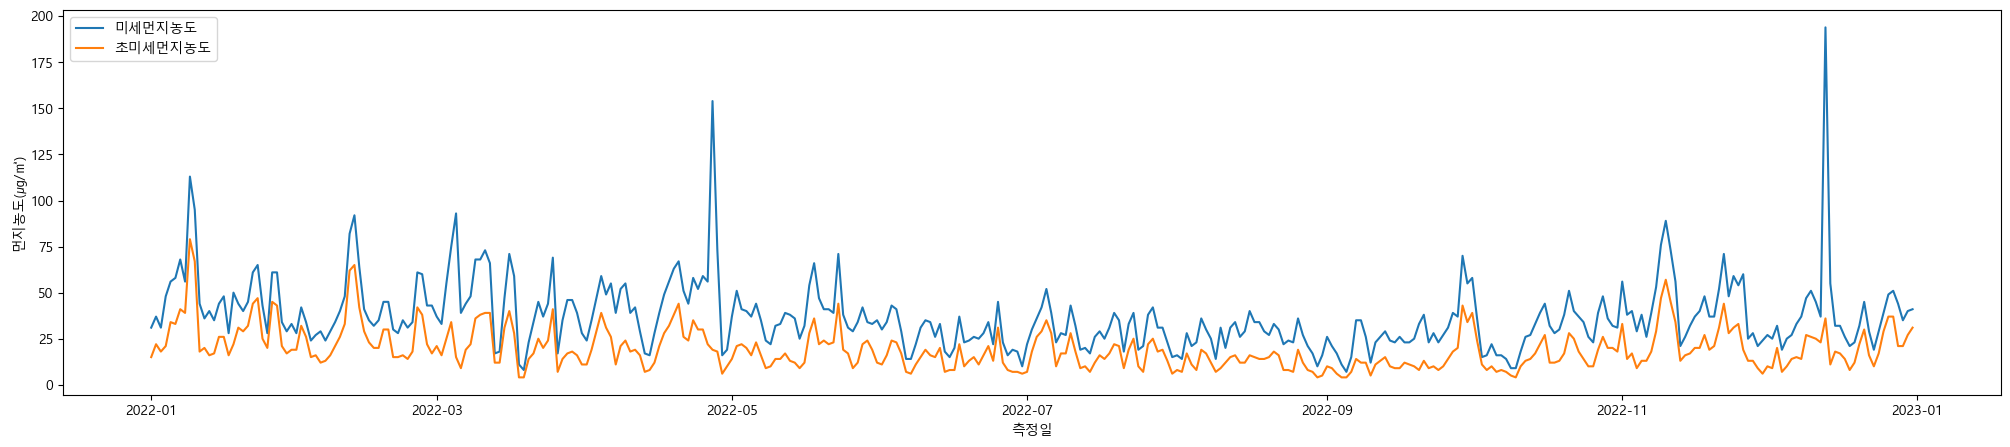

In [19]:

# 미세먼지농도, 초미세먼지농도 시계열 데이터 시각화
plt.figure(figsize=(25,5))
plt.plot(df_flt['측정일'], df_flt['미세먼지농도'], label='미세먼지농도')
plt.plot(df_flt['측정일'], df_flt['초미세먼지농도'], label='초미세먼지농도')
plt.xlabel('측정일')
plt.ylabel('먼지농도(㎍/㎥)')
plt.legend(loc='upper left')
plt.show()

In [21]:
df_flt.head(50)

,측정일,측정소명,이산화질소농도,오존농도,일산화탄소농도,아황산가스농도,미세먼지농도,초미세먼지농도
44,2022-01-01,공항대로,0.035,0.010,0.6,0.002,31.0,15.0
93,2022-01-02,공항대로,0.027,0.017,0.5,0.003,37.0,22.0
143,2022-01-03,공항대로,0.041,0.007,0.6,0.003,31.0,18.0
196,2022-01-04,공항대로,0.032,0.010,0.5,0.003,48.0,21.0
244,2022-01-05,공항대로,0.045,0.004,0.8,0.003,56.0,34.0
293,2022-01-06,공항대로,0.037,0.010,0.7,0.004,58.0,33.0
345,2022-01-07,공항대로,0.050,0.006,0.9,0.004,68.0,41.0
393,2022-01-08,공항대로,0.051,0.007,0.9,0.004,56.0,39.0
443,2022-01-09,공항대로,0.028,0.019,0.9,0.004,113.0,79.0
496,2022-01-10,공항대로,0.053,0.006,1.1,0.004,95.0,67.0


### statsmodel
 - 주기적인 데이터의 트렌드 추이
 - 날짜형 인덱스와 데이터 컬럼


In [23]:
df_flt2 = df_flt[['측정일','미세먼지농도']]
ts = df_flt2.set_index('측정일')
ts.head(3)

,미세먼지농도
측정일,
2022-01-01,31.0
2022-01-02,37.0
2022-01-03,31.0


In [24]:
#시게열 데이터의 구조를 분해하는 도구 : 실제값 추세, 게절성, 잔차를 분석 
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts['미세먼지농도'], period=30) #30일 단위로 계절성을 분석
#result.observed : 실제데이터
# result.trend #데이터의 장기적인 변화, 전반적으로 감소, 증가
result.seasonal #주기적인 계절성 패턴
result.resid #잔차(실제 값에서 추세와 계절성을 뺀 노이즈)

측정일
2022-01-01   NaN
2022-01-02   NaN
2022-01-03   NaN
2022-01-04   NaN
2022-01-05   NaN
              ..
2022-12-27   NaN
2022-12-28   NaN
2022-12-29   NaN
2022-12-30   NaN
2022-12-31   NaN
Name: resid, Length: 365, dtype: float64

In [25]:
result

### Prophet
 - 계절성, 추세, 휴일 효과등을 자동으로 모델예측
 - ds(시간), y(숫자) 컬럼

In [29]:
df_flt2.columns = ['ds','y'] #fit시 컬럼명 ds,y 읽기
df_flt2.head(1)

,ds,y
44,2022-01-01,31.0


In [31]:
from prophet import Prophet
#1. 모델 생성
p_model = Prophet()
#2. 학습
p_model.fit(df_flt2)

17:49:14 - cmdstanpy - INFO - Chain [1] start processing
17:49:14 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
#3. 30일 이후 데이터를 예측하는 미래 df를 생성
future = p_model.make_future_dataframe(periods=30)
future

In [37]:
#4. 예측수행
forecast = p_model.predict(future)
forecast.tail(40)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
355,2022-12-22,41.174853,19.100851,62.011310,41.174853,41.174853,0.012790,0.012790,0.012790,0.012790,0.012790,0.012790,0.0,0.0,0.0,41.187643
356,2022-12-23,41.290948,21.058463,67.422396,41.290948,41.290948,1.697127,1.697127,1.697127,1.697127,1.697127,1.697127,0.0,0.0,0.0,42.988074
357,2022-12-24,41.407042,21.257729,67.786382,41.407042,41.407042,1.243525,1.243525,1.243525,1.243525,1.243525,1.243525,0.0,0.0,0.0,42.650567
358,2022-12-25,41.523137,14.145284,59.399711,41.523137,41.523137,-3.597534,-3.597534,-3.597534,-3.597534,-3.597534,-3.597534,0.0,0.0,0.0,37.925603
359,2022-12-26,41.639231,15.567535,61.649916,41.639231,41.639231,-3.343109,-3.343109,-3.343109,-3.343109,-3.343109,-3.343109,0.0,0.0,0.0,38.296122
360,2022-12-27,41.755326,20.762164,66.056539,41.755326,41.755326,1.399012,1.399012,1.399012,1.399012,1.399012,1.399012,0.0,0.0,0.0,43.154337
361,2022-12-28,41.871420,20.793153,67.329801,41.871420,41.871420,2.588190,2.588190,2.588190,2.588190,2.588190,2.588190,0.0,0.0,0.0,44.459610
362,2022-12-29,41.987515,19.520748,64.454279,41.987515,41.987515,0.012790,0.012790,0.012790,0.012790,0.012790,0.012790,0.0,0.0,0.0,42.000305
363,2022-12-30,42.103609,23.463367,64.454819,42.103609,42.103609,1.697127,1.697127,1.697127,1.697127,1.697127,1.697127,0.0,0.0,0.0,43.800736
364,2022-12-31,42.219704,21.748577,66.724297,42.219704,42.219704,1.243525,1.243525,1.243525,1.243525,1.243525,1.243525,0.0,0.0,0.0,43.463229


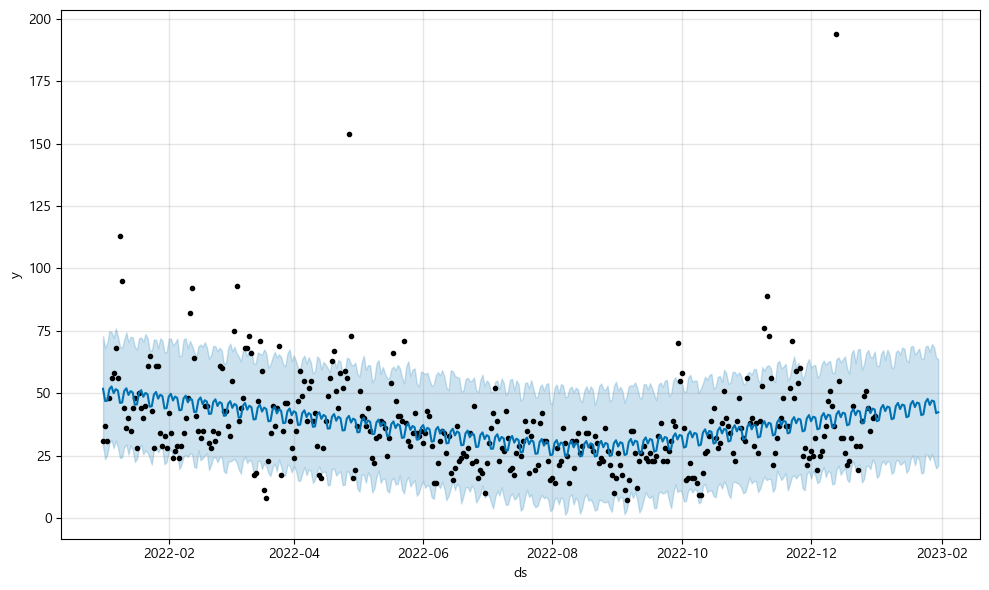

In [39]:
# 5. tlrkrghk
p = p_model.plot(forecast)

In [1]:
forecast[['ds','yhat','yhat_lower', 'yhat_upper']].tail(30)

NameError: name 'forecast' is not defined

In [2]:
#트렌드와 휴일효과
p = p_model.plot_components(forecast)

NameError: name 'p_model' is not defined

In [ ]:
#2023년 1월 12일
forecast.loc[forecast['ds']=='2023-01-06', ['ds','yhat']]